In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
from random import sample

# 编程练习7：K均值聚类与主成分分析
## 1 K均值聚类  
这一部分我们会实现一个K均值聚类算法，并用于图像压缩。
### 1.2 K均值用于样例数据
显然，scikit-learn是带有K均值算法的。但为了可视化K均值算法过程中中心点的移动，我们还是自己实现一下。

In [61]:
def kMeansInitCentroids(X, K):
    return X[sample(range(len(X)), K)]
                    
def computeCentroids(X, idx, K):
    centroids = [np.mean(X[(idx==k).flatten()], axis=0) for k in range(K)]
    return np.vstack(centroids)

def findClosestCentroids(X, centroids):
    dist = np.zeros((len(X), len(centroids)))
    for i in range(len(X)):
        for j in range(len(centroids)):
            dist[i,j] = np.linalg.norm(X[i] - centroids[j])
    centroids = np.argmin(dist, axis=1)
    return centroids
def runKmeans(X, initial_centroids, max_iters, plot_progress=False):
    progress = []
    K = len(initial_centroids)
    centroids = initial_centroids
    for i in range(max_iters):
        idx = findClosestCentroids(X, centroids)
        if plot_progress:
            progress.append(centroids.copy())
        centroids = computeCentroids(X, idx, K)
    if plot_progress:
        return centroids, idx, progress
    else:
        return centroids, idx

In [62]:
raw_data = loadmat('ex7data2.mat')
X = np.mat(raw_data['X'])

首先是实现K均值的计算中心点和查找最近中心点的算法，并测试一下：

In [63]:
K = 3
initial_centroids = np.mat([[3,3], [6,2], [8,5]])
idx = findClosestCentroids(X, initial_centroids)
print('Closest centroids for the first 3 examples: %s'%idx[0:3])
print('(the closest centroids should be 0, 2, 2 respectively)')
centroids = computeCentroids(X, idx, K)
print('Centroids computed after initial finding of closest centroids:\n%s'%centroids)
print('(the centroids should be)')
print('[ 2.428301 3.157924 ]')
print('[ 5.813503 2.633656 ]')
print('[ 7.119387 3.616684 ]')

Closest centroids for the first 3 examples: [0 2 1]
(the closest centroids should be 0, 2, 2 respectively)
Centroids computed after initial finding of closest centroids:
[[2.42830111 3.15792418]
 [5.81350331 2.63365645]
 [7.11938687 3.6166844 ]]
(the centroids should be)
[ 2.428301 3.157924 ]
[ 5.813503 2.633656 ]
[ 7.119387 3.616684 ]


然后是跑一遍K均值算法：

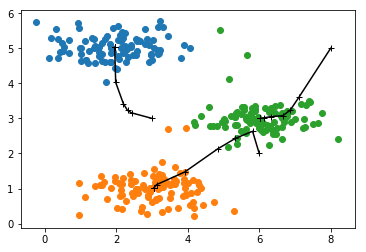

In [64]:
centroids, idx, progress = runKmeans(X, initial_centroids, 10, True)
fig, ax = plt.subplots()
for k in range(K):
    Xk = X[idx==k]
    ax.scatter(Xk[:,0].A1, Xk[:,1].A1)
    c0 = [c[k][0,0] for c in progress]
    c1 = [c[k][0,1] for c in progress]
    plt.plot(c0, c1, marker='+', c='k')
plt.show()